In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df = pd.read_csv('/home/matt/Proj/QSURv3/CPCProcessing/Mol_CPC_use_mapping.csv')

In [3]:
df.columns

Index(['SMILES', 'Patent', 'CPC_Code', 'CPC_4char', 'Functional_Use',
       'Mapping_Similarity'],
      dtype='object')

In [5]:
len(df['CPC_4char'].unique())

252

In [9]:
import pandas as pd
import numpy as np

def analyze_molecular_functions(df, min_occurrences=50):
    """
    Analyze frequently occurring molecules and their associated CPC codes and functional uses.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing columns: SMILES, CPC_Code, CPC_4char, Functional_Use, Mapping_Similarity
    min_occurrences : int
        Minimum number of times a molecule must appear to be included in analysis
    
    Returns:
    --------
    tuple : (molecule_summary, detailed_analysis)
        molecule_summary: DataFrame with summary statistics for each frequent molecule
        detailed_analysis: DataFrame with detailed function mappings for each molecule
    """
    
    # Count molecule occurrences
    molecule_counts = df['SMILES'].value_counts()
    frequent_molecules = molecule_counts[molecule_counts >= min_occurrences].index
    
    # Filter for frequent molecules
    frequent_df = df[df['SMILES'].isin(frequent_molecules)]
    
    # Initialize lists to store results
    summary_data = []
    detailed_data = []
    
    # Analyze each frequent molecule
    for molecule in frequent_molecules:
        mol_data = frequent_df[frequent_df['SMILES'] == molecule]
        
        # Count occurrences of each CPC code and functional use
        cpc_counts = mol_data['CPC_4char'].value_counts()
        func_counts = mol_data['Functional_Use'].value_counts()
        
        # Calculate average similarity scores per function
        func_similarities = mol_data.groupby('Functional_Use')['Mapping_Similarity'].agg(['mean', 'std'])
        
        # Get top CPCs and functions (those appearing > 10% of the time)
        total_occurrences = len(mol_data)
        threshold = total_occurrences * 0.1
        
        significant_cpcs = cpc_counts[cpc_counts >= threshold]
        significant_functions = func_counts[func_counts >= threshold]
        
        # Create summary entry
        summary_entry = {
            'SMILES': molecule,
            'Total_Occurrences': total_occurrences,
            'Unique_CPCs': len(cpc_counts),
            'Unique_Functions': len(func_counts),
            'Top_CPCs': ', '.join(significant_cpcs.index),
            'Top_Functions': ', '.join(significant_functions.index),
            'Avg_Similarity': mol_data['Mapping_Similarity'].mean(),
            'Max_Similarity': mol_data['Mapping_Similarity'].max()
        }
        summary_data.append(summary_entry)
        
        # Create detailed entries
        for func in significant_functions.index:
            func_data = mol_data[mol_data['Functional_Use'] == func]
            detailed_entry = {
                'SMILES': molecule,
                'Functional_Use': func,
                'Occurrence_Count': len(func_data),
                'Occurrence_Percentage': (len(func_data) / total_occurrences) * 100,
                'Avg_Similarity': func_similarities.loc[func, 'mean'],
                'Std_Similarity': func_similarities.loc[func, 'std'],
                'Associated_CPCs': ', '.join(func_data['CPC_4char'].unique())
            }
            detailed_data.append(detailed_entry)
    
    # Create DataFrames
    molecule_summary = pd.DataFrame(summary_data)
    detailed_analysis = pd.DataFrame(detailed_data)
    
    # Sort DataFrames
    molecule_summary = molecule_summary.sort_values('Total_Occurrences', ascending=False)
    detailed_analysis = detailed_analysis.sort_values(['SMILES', 'Occurrence_Percentage'], ascending=[True, False])
    
    return molecule_summary, detailed_analysis

def display_analysis_results(molecule_summary, detailed_analysis):
    """
    Display formatted analysis results and generate summary statistics.
    """
    print("\nSummary of Analysis:")
    print(f"Total molecules analyzed: {len(molecule_summary)}")
    print(f"Average functions per molecule: {molecule_summary['Unique_Functions'].mean():.2f}")
    print(f"Average similarity score: {molecule_summary['Avg_Similarity'].mean():.3f}")
    
    print("\nDistribution of Function Counts:")
    print(molecule_summary['Unique_Functions'].value_counts().sort_index())
    
    print("\nTop 10 Most Frequent Molecules:")
    print(molecule_summary[['SMILES', 'Total_Occurrences', 'Unique_Functions']].head(10))
    
    print("\nDetailed Function Analysis for First 5 Molecules:")
    for smiles in molecule_summary['SMILES'].head().values:
        mol_details = detailed_analysis[detailed_analysis['SMILES'] == smiles]
        print(f"\nMolecule: {smiles}")
        print(mol_details[['Functional_Use', 'Occurrence_Percentage', 'Avg_Similarity']].to_string())

# Example usage (once you have the data):
"""
# Read the data
df = pd.read_csv('your_data.csv')

# Run the analysis
molecule_summary, detailed_analysis = analyze_molecular_functions(df, min_occurrences=50)

# Display results
display_analysis_results(molecule_summary, detailed_analysis)

# Save results
molecule_summary.to_csv('molecule_function_summary.csv', index=False)
detailed_analysis.to_csv('molecule_function_details.csv', index=False)
"""

"\n# Read the data\ndf = pd.read_csv('your_data.csv')\n\n# Run the analysis\nmolecule_summary, detailed_analysis = analyze_molecular_functions(df, min_occurrences=50)\n\n# Display results\ndisplay_analysis_results(molecule_summary, detailed_analysis)\n\n# Save results\nmolecule_summary.to_csv('molecule_function_summary.csv', index=False)\ndetailed_analysis.to_csv('molecule_function_details.csv', index=False)\n"

In [10]:


# Run the analysis
molecule_summary, detailed_analysis = analyze_molecular_functions(df, min_occurrences=50)

# Display results
display_analysis_results(molecule_summary, detailed_analysis)


Summary of Analysis:
Total molecules analyzed: 1206
Average functions per molecule: 10.46
Average similarity score: 0.505

Distribution of Function Counts:
Unique_Functions
1       8
2       3
3      79
4      46
5      64
6      65
7     173
8      99
9     108
10     55
11     86
12     67
13     58
14     57
15     28
16     31
17     31
18     31
19     19
20     17
21     15
22     19
23     10
24     11
25      9
26      5
27      4
28      3
31      2
33      2
35      1
Name: count, dtype: int64

Top 10 Most Frequent Molecules:
                                              SMILES  Total_Occurrences  \
0  N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...               1294   
1  c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45...               1209   
2  c1ccc(-n2c(-c3ccc(-c4ccc5c(-c6ccc7ccccc7c6)c6c...                876   
3         c1ccc(-c2ccnc3c2ccc2c(-c4ccccc4)ccnc23)cc1                673   
4           N#CC(C#N)=c1c(F)c(F)c(=C(C#N)C#N)c(F)c1F                659   
5      

In [11]:
import pandas as pd
import numpy as np

def analyze_molecular_functions_weighted(df, min_occurrences=50, top_n_uses=3):
    """
    Analyze frequently occurring molecules and their associated functional uses,
    weighted by similarity scores.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with columns: SMILES, CPC_Code, CPC_4char, Functional_Use, Mapping_Similarity
    min_occurrences : int
        Minimum number of times a molecule must appear
    top_n_uses : int
        Number of top functional uses to return for each molecule
    
    Returns:
    --------
    tuple : (molecule_summary, detailed_analysis)
    """
    
    # Count molecule occurrences
    molecule_counts = df['SMILES'].value_counts()
    frequent_molecules = molecule_counts[molecule_counts >= min_occurrences].index
    
    # Filter for frequent molecules
    frequent_df = df[df['SMILES'].isin(frequent_molecules)]
    
    summary_data = []
    detailed_data = []
    
    for molecule in frequent_molecules:
        mol_data = frequent_df[frequent_df['SMILES'] == molecule]
        
        # Calculate weighted scores for each function use
        weighted_scores = mol_data.groupby('Functional_Use').agg({
            'Mapping_Similarity': ['count', 'mean', 'sum'],
            'CPC_4char': lambda x: ', '.join(sorted(set(x)))
        })
        
        # Calculate combined score: (count * mean_similarity^2)
        # Squaring the similarity gives more weight to high-confidence assignments
        weighted_scores['combined_score'] = (
            weighted_scores[('Mapping_Similarity', 'count')] * 
            weighted_scores[('Mapping_Similarity', 'mean')] ** 2
        )
        
        # Sort by combined score and get top N uses
        top_functions = weighted_scores.sort_values('combined_score', ascending=False).head(top_n_uses)
        
        # Create summary entry
        summary_entry = {
            'SMILES': molecule,
            'Total_Occurrences': len(mol_data),
            'Unique_CPCs': mol_data['CPC_4char'].nunique(),
            'Top_Functions': ', '.join(top_functions.index),
            'Avg_Similarity': mol_data['Mapping_Similarity'].mean(),
            'Max_Similarity': mol_data['Mapping_Similarity'].max()
        }
        summary_data.append(summary_entry)
        
        # Create detailed entries for top functions
        for func in top_functions.index:
            func_data = mol_data[mol_data['Functional_Use'] == func]
            
            detailed_entry = {
                'SMILES': molecule,
                'Functional_Use': func,
                'Occurrence_Count': len(func_data),
                'Total_Occurrences': len(mol_data),
                'Occurrence_Percentage': (len(func_data) / len(mol_data)) * 100,
                'Avg_Similarity': top_functions.loc[func, ('Mapping_Similarity', 'mean')],
                'Combined_Score': top_functions.loc[func, 'combined_score'],
                'Associated_CPCs': top_functions.loc[func, ('CPC_4char', '<lambda>')],
                'Rank': list(top_functions.index).index(func) + 1
            }
            detailed_data.append(detailed_entry)
    
    # Create DataFrames
    molecule_summary = pd.DataFrame(summary_data)
    detailed_analysis = pd.DataFrame(detailed_data)
    
    # Sort DataFrames
    molecule_summary = molecule_summary.sort_values('Total_Occurrences', ascending=False)
    detailed_analysis = detailed_analysis.sort_values(
        ['SMILES', 'Combined_Score'], 
        ascending=[True, False]
    )
    
    return molecule_summary, detailed_analysis

def display_weighted_analysis(molecule_summary, detailed_analysis):
    """
    Display formatted analysis results with emphasis on similarity-weighted rankings.
    """
    print("\nAnalysis Summary:")
    print(f"Total molecules analyzed: {len(molecule_summary)}")
    print(f"Average similarity score: {molecule_summary['Avg_Similarity'].mean():.3f}")
    
    print("\nTop 10 Most Frequent Molecules:")
    print(molecule_summary[['SMILES', 'Total_Occurrences', 'Top_Functions']].head(10))
    
    print("\nDetailed Function Analysis for First 5 Molecules:")
    for smiles in molecule_summary['SMILES'].head().values:
        mol_details = detailed_analysis[detailed_analysis['SMILES'] == smiles]
        print(f"\nMolecule: {smiles}")
        display_cols = ['Rank', 'Functional_Use', 'Occurrence_Percentage', 
                       'Avg_Similarity', 'Combined_Score']
        print(mol_details[display_cols].sort_values('Rank').to_string())

# Function to generate a more detailed report for a specific molecule
def analyze_single_molecule(smiles, detailed_analysis):
    """
    Generate a detailed report for a specific molecule.
    """
    mol_data = detailed_analysis[detailed_analysis['SMILES'] == smiles]
    if len(mol_data) == 0:
        return f"No data found for molecule: {smiles}"
    
    report = [f"\nDetailed Analysis for Molecule: {smiles}"]
    report.append("-" * 50)
    
    for _, row in mol_data.sort_values('Rank').iterrows():
        report.extend([
            f"Rank {row['Rank']}: {row['Functional_Use']}",
            f"  Occurrence Rate: {row['Occurrence_Percentage']:.1f}%",
            f"  Average Similarity: {row['Avg_Similarity']:.3f}",
            f"  Combined Score: {row['Combined_Score']:.3f}",
            f"  Associated CPCs: {row['Associated_CPCs']}",
            ""
        ])
    
    return "\n".join(report)

# Example usage:
"""
# Read your data
df = pd.read_csv('your_data.csv')

# Run the analysis
molecule_summary, detailed_analysis = analyze_molecular_functions_weighted(
    df, 
    min_occurrences=50,
    top_n_uses=3
)

# Display overall results
display_weighted_analysis(molecule_summary, detailed_analysis)

# Look at specific molecules in detail
for smiles in molecule_summary['SMILES'].head(3):
    print(analyze_single_molecule(smiles, detailed_analysis))

# Save results
molecule_summary.to_csv('molecule_function_summary_weighted.csv', index=False)
detailed_analysis.to_csv('molecule_function_details_weighted.csv', index=False)
"""

"\n# Read your data\ndf = pd.read_csv('your_data.csv')\n\n# Run the analysis\nmolecule_summary, detailed_analysis = analyze_molecular_functions_weighted(\n    df, \n    min_occurrences=50,\n    top_n_uses=3\n)\n\n# Display overall results\ndisplay_weighted_analysis(molecule_summary, detailed_analysis)\n\n# Look at specific molecules in detail\nfor smiles in molecule_summary['SMILES'].head(3):\n    print(analyze_single_molecule(smiles, detailed_analysis))\n\n# Save results\nmolecule_summary.to_csv('molecule_function_summary_weighted.csv', index=False)\ndetailed_analysis.to_csv('molecule_function_details_weighted.csv', index=False)\n"

In [12]:

# Run the analysis
molecule_summary, detailed_analysis = analyze_molecular_functions_weighted(
    df, 
    min_occurrences=50,
    top_n_uses=3
)

# Display overall results
display_weighted_analysis(molecule_summary, detailed_analysis)

# Look at specific molecules in detail
for smiles in molecule_summary['SMILES'].head(3):
    print(analyze_single_molecule(smiles, detailed_analysis))


TypeError: unhashable type: 'Series'

In [13]:
import pandas as pd
import numpy as np

def analyze_molecule_cpc_frequencies(df, min_occurrences=50):
    """
    Analyze CPC code frequencies for molecules that appear frequently in the dataset.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with columns: SMILES, CPC_4char, Mapping_Similarity
    min_occurrences : int
        Minimum number of times a molecule must appear to be included
    
    Returns:
    --------
    DataFrame with molecule-CPC associations and their frequencies
    """
    # Count total occurrences of each molecule
    molecule_counts = df['SMILES'].value_counts()
    frequent_molecules = molecule_counts[molecule_counts >= min_occurrences].index
    
    # Filter for frequent molecules
    frequent_df = df[df['SMILES'].isin(frequent_molecules)].copy()
    
    # Group by molecule and CPC code, calculating frequencies and mean similarity
    grouped = frequent_df.groupby(['SMILES', 'CPC_4char']).agg({
        'Mapping_Similarity': ['count', 'mean'],
        'Functional_Use': 'first'  # Keep one functional use mapping for reference
    }).reset_index()
    
    # Rename columns for clarity
    grouped.columns = ['SMILES', 'CPC_4char', 'Occurrence_Count', 'Avg_Similarity', 'Functional_Use']
    
    # Calculate total occurrences for each molecule
    total_counts = frequent_df['SMILES'].value_counts()
    grouped['Total_Molecule_Occurrences'] = grouped['SMILES'].map(total_counts)
    
    # Calculate percentage of occurrences
    grouped['Occurrence_Percentage'] = (grouped['Occurrence_Count'] / 
                                      grouped['Total_Molecule_Occurrences'] * 100)
    
    # Calculate weighted score (frequency * similarity)
    grouped['Weighted_Score'] = grouped['Occurrence_Percentage'] * grouped['Avg_Similarity']
    
    # Sort by SMILES and weighted score
    grouped = grouped.sort_values(['SMILES', 'Weighted_Score'], ascending=[True, False])
    
    # Keep top 3 CPC codes for each molecule
    top_associations = grouped.groupby('SMILES').head(3).copy()
    
    # Add rank within each molecule group
    top_associations['Rank'] = top_associations.groupby('SMILES').cumcount() + 1
    
    # Sort by total occurrences (most frequent molecules first) and rank
    final_result = top_associations.sort_values(
        ['Total_Molecule_Occurrences', 'SMILES', 'Rank'], 
        ascending=[False, True, True]
    )
    
    return final_result

def display_analysis_summary(df):
    """
    Display a summary of the analysis results.
    """
    print(f"\nTotal unique molecules analyzed: {df['SMILES'].nunique()}")
    print(f"Total unique CPC codes found: {df['CPC_4char'].nunique()}")
    
    print("\nTop 10 most frequent molecules and their top CPC associations:")
    for smiles in df['SMILES'].unique()[:10]:
        molecule_data = df[df['SMILES'] == smiles]
        print(f"\nMolecule: {smiles}")
        print(f"Total occurrences: {molecule_data['Total_Molecule_Occurrences'].iloc[0]}")
        for _, row in molecule_data.iterrows():
            print(f"  Rank {row['Rank']}: CPC {row['CPC_4char']}")
            print(f"    Occurrence: {row['Occurrence_Percentage']:.1f}%")
            print(f"    Avg Similarity: {row['Avg_Similarity']:.3f}")
            print(f"    Function: {row['Functional_Use']}")

# Example usage:


# Run the analysis
results = analyze_molecule_cpc_frequencies(df, min_occurrences=50)

# Display summary
display_analysis_summary(results)



# Get summary statistics
print("\nSummary Statistics:")
print(results['Occurrence_Percentage'].describe())
print("\nAverage Similarity Score by Rank:")
print(results.groupby('Rank')['Avg_Similarity'].mean())



Total unique molecules analyzed: 1206
Total unique CPC codes found: 50

Top 10 most frequent molecules and their top CPC associations:

Molecule: N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2nc1C#N
Total occurrences: 1294
  Rank 1: CPC C07D
    Occurrence: 39.3%
    Avg Similarity: 0.511
    Function: Freeze-thaw additive
  Rank 2: CPC C07F
    Occurrence: 23.8%
    Avg Similarity: 0.502
    Function: Refrigerants
  Rank 3: CPC H10K
    Occurrence: 11.9%
    Avg Similarity: 0.504
    Function: Bleaching agent

Molecule: c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45)cc3)cc2)c2cccc3ccccc23)cc1
Total occurrences: 1209
  Rank 1: CPC C07D
    Occurrence: 36.1%
    Avg Similarity: 0.511
    Function: Freeze-thaw additive
  Rank 2: CPC C07F
    Occurrence: 25.6%
    Avg Similarity: 0.502
    Function: Refrigerants
  Rank 3: CPC H10K
    Occurrence: 12.5%
    Avg Similarity: 0.504
    Function: Bleaching agent

Molecule: c1ccc(-n2c(-c3ccc(-c4ccc5c(-c6ccc7ccccc7c6)c6ccccc6c(-c6ccc7ccccc7c6)c

In [24]:
results.head()

,SMILES,CPC_4char,Occurrence_Count,Avg_Similarity,Functional_Use,Total_Molecule_Occurrences,Occurrence_Percentage,Weighted_Score,Rank
7012,N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...,C07D,508,0.510843,Freeze-thaw additive,1294,39.258114,20.054716,1
7013,N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...,C07F,308,0.502259,Refrigerants,1294,23.802164,11.954861,2
7032,N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...,H10K,154,0.503662,Bleaching agent,1294,11.901082,5.994124,3
11949,c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45...,C07D,437,0.510843,Freeze-thaw additive,1209,36.145575,18.464698,1
11950,c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45...,C07F,310,0.502259,Refrigerants,1209,25.641026,12.878447,2


In [22]:
import matplotlib.pyplot as plt

(array([2091.,  459.,  706.,   99.,   79.,   36.,   19.,  101.,    5.,
           4.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

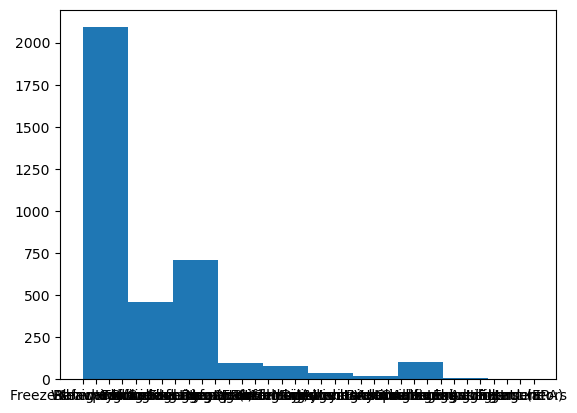

In [25]:
plt.hist(results['Functional_Use'])

In [27]:
import pandas as pd
import numpy as np

def analyze_molecule_functional_uses(df, min_occurrences=50):
    """
    Analyze functional use frequencies for molecules that appear frequently in the dataset.
    Returns top 3 functional uses for each molecule.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with columns: SMILES, CPC_4char, Functional_Use, Mapping_Similarity
    min_occurrences : int
        Minimum number of times a molecule must appear to be included
    """
    # Count total occurrences of each molecule
    molecule_counts = df['SMILES'].value_counts()
    frequent_molecules = molecule_counts[molecule_counts >= min_occurrences].index
    
    # Filter for frequent molecules
    frequent_df = df[df['SMILES'].isin(frequent_molecules)].copy()
    
    # Group by molecule and functional use, calculating frequencies and statistics
    grouped = frequent_df.groupby(['SMILES', 'Functional_Use']).agg({
        'Mapping_Similarity': ['count', 'mean', 'max'],
        'CPC_4char': lambda x: ', '.join(sorted(set(x)))  # Keep all associated CPCs
    }).reset_index()
    
    # Fix column names
    grouped.columns = ['SMILES', 'Functional_Use', 'Occurrence_Count', 
                      'Avg_Similarity', 'Max_Similarity', 'Associated_CPCs']
    
    # Calculate total occurrences for each molecule
    total_counts = frequent_df['SMILES'].value_counts()
    grouped['Total_Molecule_Occurrences'] = grouped['SMILES'].map(total_counts)
    
    # Calculate percentage of occurrences
    grouped['Occurrence_Percentage'] = (grouped['Occurrence_Count'] / 
                                      grouped['Total_Molecule_Occurrences'] * 100)
    
    # Calculate weighted score (frequency * similarity^2)
    # Squaring similarity gives more weight to high-confidence assignments
    grouped['Weighted_Score'] = grouped['Occurrence_Percentage'] * (grouped['Avg_Similarity'] ** 2)
    
    # Sort by SMILES and weighted score
    grouped = grouped.sort_values(['SMILES', 'Weighted_Score'], ascending=[True, False])
    
    # Keep top 3 functional uses for each molecule
    top_uses = grouped.groupby('SMILES').head(3).copy()
    
    # Add rank within each molecule group
    top_uses['Rank'] = top_uses.groupby('SMILES').cumcount() + 1
    
    # Sort by total occurrences (most frequent molecules first) and rank
    final_result = top_uses.sort_values(
        ['Total_Molecule_Occurrences', 'SMILES', 'Rank'], 
        ascending=[False, True, True]
    )
    
    return final_result

def display_functional_use_summary(df):
    """
    Display a summary of the functional use analysis results.
    """
    print(f"\nTotal unique molecules analyzed: {df['SMILES'].nunique()}")
    print(f"Total unique functional uses found: {df['Functional_Use'].nunique()}")
    
    print("\nTop 10 most frequent molecules and their functional uses:")
    for smiles in df['SMILES'].unique()[:10]:
        molecule_data = df[df['SMILES'] == smiles]
        print(f"\nMolecule: {smiles}")
        print(f"Total occurrences: {molecule_data['Total_Molecule_Occurrences'].iloc[0]}")
        for _, row in molecule_data.iterrows():
            print(f"\nRank {row['Rank']}: {row['Functional_Use']}")
            print(f"  Occurrence: {row['Occurrence_Percentage']:.1f}%")
            print(f"  Avg Similarity: {row['Avg_Similarity']:.3f}")
            print(f"  Associated CPCs: {row['Associated_CPCs']}")

def analyze_coverage_statistics(df):
    """
    Analyze coverage and distribution statistics of the functional use mappings.
    """
    stats = {
        'Total Molecules': df['SMILES'].nunique(),
        'Average Uses per Molecule': 3,  # Since we're keeping top 3
        'Mean Similarity Score': df['Avg_Similarity'].mean(),
        'Median Similarity Score': df['Avg_Similarity'].median(),
        'Most Common Functional Uses': df['Functional_Use'].value_counts().head(5).to_dict()
    }
    
    print("\nCoverage Statistics:")
    for key, value in stats.items():
        if key != 'Most Common Functional Uses':
            print(f"{key}: {value:.2f}")
    
    print("\nMost Common Functional Uses:")
    for func, count in stats['Most Common Functional Uses'].items():
        print(f"  {func}: {count} molecules")

# Example usage:
"""
# Read your data
df = pd.read_csv('your_data.csv')

# Run the analysis
results = analyze_molecule_functional_uses(df, min_occurrences=50)

# Display summaries
display_functional_use_summary(results)
analyze_coverage_statistics(results)

# Save results
results.to_csv('molecule_functional_uses.csv', index=False)

# Additional analysis of similarity scores by rank
print("\nAverage Similarity Score by Rank:")
rank_similarities = results.groupby('Rank')['Avg_Similarity'].agg(['mean', 'std', 'min', 'max'])
print(rank_similarities)
"""

'\n# Read your data\ndf = pd.read_csv(\'your_data.csv\')\n\n# Run the analysis\nresults = analyze_molecule_functional_uses(df, min_occurrences=50)\n\n# Display summaries\ndisplay_functional_use_summary(results)\nanalyze_coverage_statistics(results)\n\n# Save results\nresults.to_csv(\'molecule_functional_uses.csv\', index=False)\n\n# Additional analysis of similarity scores by rank\nprint("\nAverage Similarity Score by Rank:")\nrank_similarities = results.groupby(\'Rank\')[\'Avg_Similarity\'].agg([\'mean\', \'std\', \'min\', \'max\'])\nprint(rank_similarities)\n'

In [28]:

# Run the analysis
results = analyze_molecule_functional_uses(df, min_occurrences=50)

# Display summaries
display_functional_use_summary(results)
analyze_coverage_statistics(results)



Total unique molecules analyzed: 1206
Total unique functional uses found: 36

Top 10 most frequent molecules and their functional uses:

Molecule: N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2nc1C#N
Total occurrences: 1294

Rank 1: Freeze-thaw additive
  Occurrence: 39.3%
  Avg Similarity: 0.511
  Associated CPCs: C07D

Rank 2: Refrigerants
  Occurrence: 23.8%
  Avg Similarity: 0.502
  Associated CPCs: C07F

Rank 3: Bleaching agent
  Occurrence: 11.9%
  Avg Similarity: 0.504
  Associated CPCs: H10K

Molecule: c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45)cc3)cc2)c2cccc3ccccc23)cc1
Total occurrences: 1209

Rank 1: Freeze-thaw additive
  Occurrence: 36.1%
  Avg Similarity: 0.511
  Associated CPCs: C07D

Rank 2: Refrigerants
  Occurrence: 25.6%
  Avg Similarity: 0.502
  Associated CPCs: C07F

Rank 3: Bleaching agent
  Occurrence: 12.5%
  Avg Similarity: 0.504
  Associated CPCs: H10K

Molecule: c1ccc(-n2c(-c3ccc(-c4ccc5c(-c6ccc7ccccc7c6)c6ccccc6c(-c6ccc7ccccc7c6)c5c4)cc3)nc3ccccc32)cc1


In [29]:
results

,SMILES,Functional_Use,Occurrence_Count,Avg_Similarity,Max_Similarity,Associated_CPCs,Total_Molecule_Occurrences,Occurrence_Percentage,Weighted_Score,Rank
6593,N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...,Freeze-thaw additive,508,0.510843,0.510843,C07D,1294,39.258114,10.244802,1
6599,N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...,Refrigerants,308,0.502259,0.502259,C07F,1294,23.802164,6.004442,2
6583,N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...,Bleaching agent,154,0.503662,0.503662,H10K,1294,11.901082,3.019013,3
11247,c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45...,Freeze-thaw additive,437,0.510843,0.510843,C07D,1209,36.145575,9.432554,1
11253,c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45...,Refrigerants,310,0.502259,0.502259,C07F,1209,25.641026,6.468321,2
...,...,...,...,...,...,...,...,...,...,...
11513,c1ccc(Oc2ccccc2)cc1,Refrigerants,12,0.502259,0.502259,C07F,50,24.000000,6.054349,2
11510,c1ccc(Oc2ccccc2)cc1,Freeze-thaw additive,6,0.510843,0.510843,C07D,50,12.000000,3.131521,3
11752,c1ccc2c(-c3c4ccccc4c(-c4ccc5oc6ccccc6c5c4)c4cc...,Freeze-thaw additive,21,0.510843,0.510843,C07D,50,42.000000,10.960325,1
11750,c1ccc2c(-c3c4ccccc4c(-c4ccc5oc6ccccc6c5c4)c4cc...,Color scavenger (EPA),11,0.502259,0.502259,C09K,50,22.000000,5.549819,2


In [30]:
import pandas as pd
import numpy as np

def analyze_molecule_functional_uses(df, min_occurrences=50):
    """
    Analyze functional use frequencies for molecules that appear frequently in the dataset.
    Returns top 3 functional uses for each molecule.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with columns: SMILES, CPC_4char, Functional_Use, Mapping_Similarity
    min_occurrences : int
        Minimum number of times a molecule must appear to be included
    """
    # Count total occurrences of each molecule
    molecule_counts = df['SMILES'].value_counts()
    frequent_molecules = molecule_counts[molecule_counts >= min_occurrences].index
    
    # Filter for frequent molecules
    frequent_df = df[df['SMILES'].isin(frequent_molecules)].copy()
    
    # Group by molecule and functional use, calculating frequencies and statistics
    grouped = frequent_df.groupby(['SMILES', 'Functional_Use']).agg({
        'Mapping_Similarity': ['count', 'mean', 'max'],
        'CPC_4char': lambda x: ', '.join(sorted(set(x)))  # Keep all associated CPCs
    }).reset_index()
    
    # Fix column names
    grouped.columns = ['SMILES', 'Functional_Use', 'Occurrence_Count', 
                      'Avg_Similarity', 'Max_Similarity', 'Associated_CPCs']
    
    # Calculate total occurrences for each molecule
    total_counts = frequent_df['SMILES'].value_counts()
    grouped['Total_Molecule_Occurrences'] = grouped['SMILES'].map(total_counts)
    
    # Calculate percentage of occurrences
    grouped['Occurrence_Percentage'] = (grouped['Occurrence_Count'] / 
                                      grouped['Total_Molecule_Occurrences'] * 100)
    
    # Calculate weighted score (frequency * similarity^2)
    # Squaring similarity gives more weight to high-confidence assignments
    grouped['Weighted_Score'] = grouped['Occurrence_Percentage'] * (grouped['Avg_Similarity'] ** 2)
    
    # Sort by SMILES and weighted score
    grouped = grouped.sort_values(['SMILES', 'Weighted_Score'], ascending=[True, False])
    
    # Keep top 3 functional uses for each molecule
    top_uses = grouped.groupby('SMILES').head(3).copy()
    
    # Add rank within each molecule group
    top_uses['Rank'] = top_uses.groupby('SMILES').cumcount() + 1
    
    # Sort by total occurrences (most frequent molecules first) and rank
    final_result = top_uses.sort_values(
        ['Total_Molecule_Occurrences', 'SMILES', 'Rank'], 
        ascending=[False, True, True]
    )
    
    return final_result

def display_functional_use_summary(df):
    """
    Display a summary of the functional use analysis results.
    """
    print(f"\nTotal unique molecules analyzed: {df['SMILES'].nunique()}")
    print(f"Total unique functional uses found: {df['Functional_Use'].nunique()}")
    
    print("\nTop 10 most frequent molecules and their functional uses:")
    for smiles in df['SMILES'].unique()[:10]:
        molecule_data = df[df['SMILES'] == smiles]
        print(f"\nMolecule: {smiles}")
        print(f"Total occurrences: {molecule_data['Total_Molecule_Occurrences'].iloc[0]}")
        for _, row in molecule_data.iterrows():
            print(f"\nRank {row['Rank']}: {row['Functional_Use']}")
            print(f"  Occurrence: {row['Occurrence_Percentage']:.1f}%")
            print(f"  Avg Similarity: {row['Avg_Similarity']:.3f}")
            print(f"  Associated CPCs: {row['Associated_CPCs']}")

def analyze_coverage_statistics(df):
    """
    Analyze coverage and distribution statistics of the functional use mappings.
    """
    stats = {
        'Total Molecules': df['SMILES'].nunique(),
        'Average Uses per Molecule': 3,  # Since we're keeping top 3
        'Mean Similarity Score': df['Avg_Similarity'].mean(),
        'Median Similarity Score': df['Avg_Similarity'].median(),
        'Most Common Functional Uses': df['Functional_Use'].value_counts().head(5).to_dict()
    }
    
    print("\nCoverage Statistics:")
    for key, value in stats.items():
        if key != 'Most Common Functional Uses':
            print(f"{key}: {value:.2f}")
    
    print("\nMost Common Functional Uses:")
    for func, count in stats['Most Common Functional Uses'].items():
        print(f"  {func}: {count} molecules")

# Example usage:


# Run the analysis
results = analyze_molecule_functional_uses(df, min_occurrences=50)

# Display summaries
display_functional_use_summary(results)
analyze_coverage_statistics(results)




Total unique molecules analyzed: 1206
Total unique functional uses found: 36

Top 10 most frequent molecules and their functional uses:

Molecule: N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2nc1C#N
Total occurrences: 1294

Rank 1: Freeze-thaw additive
  Occurrence: 39.3%
  Avg Similarity: 0.511
  Associated CPCs: C07D

Rank 2: Refrigerants
  Occurrence: 23.8%
  Avg Similarity: 0.502
  Associated CPCs: C07F

Rank 3: Bleaching agent
  Occurrence: 11.9%
  Avg Similarity: 0.504
  Associated CPCs: H10K

Molecule: c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45)cc3)cc2)c2cccc3ccccc23)cc1
Total occurrences: 1209

Rank 1: Freeze-thaw additive
  Occurrence: 36.1%
  Avg Similarity: 0.511
  Associated CPCs: C07D

Rank 2: Refrigerants
  Occurrence: 25.6%
  Avg Similarity: 0.502
  Associated CPCs: C07F

Rank 3: Bleaching agent
  Occurrence: 12.5%
  Avg Similarity: 0.504
  Associated CPCs: H10K

Molecule: c1ccc(-n2c(-c3ccc(-c4ccc5c(-c6ccc7ccccc7c6)c6ccccc6c(-c6ccc7ccccc7c6)c5c4)cc3)nc3ccccc32)cc1


In [31]:
results

,SMILES,Functional_Use,Occurrence_Count,Avg_Similarity,Max_Similarity,Associated_CPCs,Total_Molecule_Occurrences,Occurrence_Percentage,Weighted_Score,Rank
6593,N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...,Freeze-thaw additive,508,0.510843,0.510843,C07D,1294,39.258114,10.244802,1
6599,N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...,Refrigerants,308,0.502259,0.502259,C07F,1294,23.802164,6.004442,2
6583,N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...,Bleaching agent,154,0.503662,0.503662,H10K,1294,11.901082,3.019013,3
11247,c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45...,Freeze-thaw additive,437,0.510843,0.510843,C07D,1209,36.145575,9.432554,1
11253,c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45...,Refrigerants,310,0.502259,0.502259,C07F,1209,25.641026,6.468321,2
...,...,...,...,...,...,...,...,...,...,...
11513,c1ccc(Oc2ccccc2)cc1,Refrigerants,12,0.502259,0.502259,C07F,50,24.000000,6.054349,2
11510,c1ccc(Oc2ccccc2)cc1,Freeze-thaw additive,6,0.510843,0.510843,C07D,50,12.000000,3.131521,3
11752,c1ccc2c(-c3c4ccccc4c(-c4ccc5oc6ccccc6c5c4)c4cc...,Freeze-thaw additive,21,0.510843,0.510843,C07D,50,42.000000,10.960325,1
11750,c1ccc2c(-c3c4ccccc4c(-c4ccc5oc6ccccc6c5c4)c4cc...,Color scavenger (EPA),11,0.502259,0.502259,C09K,50,22.000000,5.549819,2


In [32]:
import pandas as pd
import numpy as np

def analyze_molecule_top_uses(df, min_occurrences=50):
    """
    Get the top 3 functional uses for each molecule, combined into a single row.
    """
    # Count total occurrences of each molecule
    molecule_counts = df['SMILES'].value_counts()
    frequent_molecules = molecule_counts[molecule_counts >= min_occurrences].index
    
    # Filter for frequent molecules
    frequent_df = df[df['SMILES'].isin(frequent_molecules)].copy()
    
    # Initialize results list
    results = []
    
    # Process each molecule
    for smiles in frequent_molecules:
        mol_data = frequent_df[frequent_df['SMILES'] == smiles]
        
        # Group by functional use and calculate metrics
        use_stats = mol_data.groupby('Functional_Use').agg({
            'Mapping_Similarity': ['count', 'mean', 'max'],
            'CPC_4char': lambda x: ', '.join(sorted(set(x)))
        }).reset_index()
        
        # Rename columns
        use_stats.columns = ['Functional_Use', 'Count', 'Avg_Similarity', 
                           'Max_Similarity', 'CPCs']
        
        # Calculate weighted score
        use_stats['Weighted_Score'] = (use_stats['Count'] / len(mol_data)) * (use_stats['Avg_Similarity'] ** 2)
        
        # Get top 3 uses
        top_uses = use_stats.nlargest(3, 'Weighted_Score')
        
        # Combine the information for top 3 uses
        result = {
            'SMILES': smiles,
            'Total_Occurrences': len(mol_data),
            'Functional_Uses': ' | '.join([
                f"1. {top_uses.iloc[0]['Functional_Use']} ({top_uses.iloc[0]['Avg_Similarity']:.3f})",
                f"2. {top_uses.iloc[1]['Functional_Use']} ({top_uses.iloc[1]['Avg_Similarity']:.3f})",
                f"3. {top_uses.iloc[2]['Functional_Use']} ({top_uses.iloc[2]['Avg_Similarity']:.3f})"
            ] if len(top_uses) >= 3 else ["Not enough data"]),
            'Top_CPCs': ' | '.join([
                f"1. {top_uses.iloc[0]['CPCs']}",
                f"2. {top_uses.iloc[1]['CPCs']}",
                f"3. {top_uses.iloc[2]['CPCs']}"
            ] if len(top_uses) >= 3 else ["Not enough data"]),
            'Average_Similarities': ' | '.join([
                f"{sim:.3f}" for sim in top_uses['Avg_Similarity']
            ]),
            'Weighted_Scores': ' | '.join([
                f"{score:.3f}" for score in top_uses['Weighted_Score']
            ])
        }
        results.append(result)
    
    # Convert to DataFrame and sort by total occurrences
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('Total_Occurrences', ascending=False)
    
    return results_df

def display_combined_results(df):
    """
    Display results in a readable format
    """
    print(f"\nAnalyzed {len(df)} molecules")
    print("\nTop 5 most frequent molecules:")
    for _, row in df.head().iterrows():
        print(f"\nMolecule: {row['SMILES']}")
        print(f"Total Occurrences: {row['Total_Occurrences']}")
        print("Top 3 Functional Uses:")
        print(row['Functional_Uses'])
        print("Associated CPCs:")
        print(row['Top_CPCs'])

# Example usage:


# Run analysis
results = analyze_molecule_top_uses(df, min_occurrences=50)

# Display results
display_combined_results(results)




Analyzed 1206 molecules

Top 5 most frequent molecules:

Molecule: N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2nc1C#N
Total Occurrences: 1294
Top 3 Functional Uses:
1. Freeze-thaw additive (0.511) | 2. Refrigerants (0.502) | 3. Bleaching agent (0.504)
Associated CPCs:
1. C07D | 2. C07F | 3. H10K

Molecule: c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45)cc3)cc2)c2cccc3ccccc23)cc1
Total Occurrences: 1209
Top 3 Functional Uses:
1. Freeze-thaw additive (0.511) | 2. Refrigerants (0.502) | 3. Bleaching agent (0.504)
Associated CPCs:
1. C07D | 2. C07F | 3. H10K

Molecule: c1ccc(-n2c(-c3ccc(-c4ccc5c(-c6ccc7ccccc7c6)c6ccccc6c(-c6ccc7ccccc7c6)c5c4)cc3)nc3ccccc32)cc1
Total Occurrences: 876
Top 3 Functional Uses:
1. Freeze-thaw additive (0.511) | 2. Refrigerants (0.502) | 3. Bleaching agent (0.504)
Associated CPCs:
1. C07D | 2. C07F | 3. H10K

Molecule: c1ccc(-c2ccnc3c2ccc2c(-c4ccccc4)ccnc23)cc1
Total Occurrences: 673
Top 3 Functional Uses:
1. Freeze-thaw additive (0.511) | 2. Refrigerants (0.5

In [33]:
results

,SMILES,Total_Occurrences,Functional_Uses,Top_CPCs,Average_Similarities,Weighted_Scores
0,N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...,1294,1. Freeze-thaw additive (0.511) | 2. Refrigera...,1. C07D | 2. C07F | 3. H10K,0.511 | 0.502 | 0.504,0.102 | 0.060 | 0.030
1,c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45...,1209,1. Freeze-thaw additive (0.511) | 2. Refrigera...,1. C07D | 2. C07F | 3. H10K,0.511 | 0.502 | 0.504,0.094 | 0.065 | 0.032
2,c1ccc(-n2c(-c3ccc(-c4ccc5c(-c6ccc7ccccc7c6)c6c...,876,1. Freeze-thaw additive (0.511) | 2. Refrigera...,1. C07D | 2. C07F | 3. H10K,0.511 | 0.502 | 0.504,0.091 | 0.079 | 0.030
3,c1ccc(-c2ccnc3c2ccc2c(-c4ccccc4)ccnc23)cc1,673,1. Freeze-thaw additive (0.511) | 2. Refrigera...,1. C07D | 2. C07F | 3. H10K,0.511 | 0.502 | 0.504,0.078 | 0.061 | 0.049
4,N#CC(C#N)=c1c(F)c(F)c(=C(C#N)C#N)c(F)c1F,659,1. Freeze-thaw additive (0.511) | 2. Refrigera...,1. C07D | 2. C07F | 3. H10K,0.511 | 0.502 | 0.504,0.082 | 0.075 | 0.037
...,...,...,...,...,...,...
1171,CCCCCCCCCOC(=O)CCCCCCCN(CCO)CCCCCCCC(=O)OC1CCC...,50,1. Waterproofing agent (0.504) | 2. Biocide (0...,1. A61K | 2. A61P | 3. C12N,0.504 | 0.508 | 0.518,0.218 | 0.031 | 0.005
1172,CC(C)(C)OC(=O)N1CCC(N)C1,50,1. Waterproofing agent (0.504) | 2. Biocide (0...,1. A61K | 2. A61P | 3. C07D,0.504 | 0.508 | 0.511,0.127 | 0.103 | 0.026
1159,CCCC1CCC(c2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)CC1,50,1. Color scavenger (EPA) (0.502) | 2. Freeze-t...,1. C09K | 2. C07D | 3. C08F,0.502 | 0.511 | 0.504,0.121 | 0.047 | 0.031
1163,Cc1cccc2c1-c1ccccc1C21c2ccccc2-c2ccccc21,50,1. Freeze-thaw additive (0.511) | 2. Conductiv...,1. C07D | 2. C07C | 3. H10K,0.511 | 0.502 | 0.504,0.099 | 0.076 | 0.030


In [10]:
import pandas as pd
import numpy as np

def get_top_3_functions(df, min_occurrences=100):
    # Get molecules that appear at least min_occurrences times
    molecule_counts = df['SMILES'].value_counts()
    frequent_molecules = molecule_counts[molecule_counts >= min_occurrences].index
    
    # Filter for frequent molecules
    frequent_df = df[df['SMILES'].isin(frequent_molecules)].copy()
    
    results = []
    
    for smiles in frequent_molecules:
        # Get data for this molecule
        mol_data = frequent_df[frequent_df['SMILES'] == smiles]
        
        # Calculate weighted scores for each function
        func_scores = mol_data.groupby('Functional_Use').agg({
            'Mapping_Similarity': ['count', 'mean']
        }).reset_index()
        
        # Calculate weighted score (frequency * similarity)
        func_scores['weighted_score'] = (func_scores[('Mapping_Similarity', 'count')] / len(mol_data)) * \
                                      func_scores[('Mapping_Similarity', 'mean')]
        
        # Get top 3 functions
        top_3 = func_scores.nlargest(10, 'weighted_score')['Functional_Use'].tolist()
        
        # Add to results
        results.append({
            'SMILES': smiles,
            'top_functions': top_3,
            'total_occurrences': len(mol_data)
        })
    
    return pd.DataFrame(results)

# Example usage:
"""
df = pd.read_csv('your_data.csv')
results = get_top_3_functions(df, min_occurrences=50)
results.to_csv('top_3_functions.csv', index=False)
"""

"\ndf = pd.read_csv('your_data.csv')\nresults = get_top_3_functions(df, min_occurrences=50)\nresults.to_csv('top_3_functions.csv', index=False)\n"

In [11]:
results = get_top_3_functions(df, min_occurrences=25)
results.to_csv('top_10_functions.csv', index=False)

In [12]:
results

,SMILES,top_functions,total_occurrences
0,N#Cc1nc2c3nc(C#N)c(C#N)nc3c3nc(C#N)c(C#N)nc3c2...,"[Freeze-thaw additive, Refrigerants, Bleaching...",1294
1,c1ccc(N(c2ccc(-c3ccc(N(c4ccccc4)c4cccc5ccccc45...,"[Freeze-thaw additive, Refrigerants, Bleaching...",1209
2,c1ccc(-n2c(-c3ccc(-c4ccc5c(-c6ccc7ccccc7c6)c6c...,"[Freeze-thaw additive, Refrigerants, Bleaching...",876
3,c1ccc(-c2ccnc3c2ccc2c(-c4ccccc4)ccnc23)cc1,"[Freeze-thaw additive, Refrigerants, Bleaching...",673
4,N#CC(C#N)=c1c(F)c(F)c(=C(C#N)C#N)c(F)c1F,"[Freeze-thaw additive, Refrigerants, Bleaching...",659
...,...,...,...
3431,Cc1ccc2c(c1)c1c3ccccc3ccc1n2C,"[Freeze-thaw additive, Astringent (EPA), Color...",25
3432,C=CC(=O)NCO,"[UV stabilizer, Chelating agent, Refrigerants,...",25
3433,O=C(O)C[N+](=O)[O-],"[Waterproofing agent, Biocide, UV stabilizer, ...",25
3434,O=S(=O)(C(S(=O)(=O)C(F)(F)F)S(=O)(=O)C(F)(F)F)...,"[Chelating agent, Reducing agent, Emulsifier, ...",25


In [38]:
import pandas as pd
import ast  # For safely evaluating string representations of lists

# Read both files
df1 = pd.read_csv('/home/matt/Proj/QSURv3/PatentMolProcessing/PatentMolFeaturized.csv')
df2 = pd.read_csv('/home/matt/Proj/QSURv3/Data/Curated/UseCaseDataModeling.csv')

# Create mapping dictionary
mapping_dict = dict(zip(df2['Harmonized Functional Use'], 
                       df2['Harmonized Functional Use Encoded']))

# First, ensure the top_functions column is properly read as a list
# If it's stored as a string representation of a list, convert it
if isinstance(df1['top_functions'].iloc[0], str):
    df1['top_functions'] = df1['top_functions'].apply(ast.literal_eval)

# Create the encoded functions list using list comprehension
df1['encoded_functions'] = df1['top_functions'].apply(
    lambda x: [mapping_dict.get(func) for func in x if func in mapping_dict]
)

# Check for unmapped values
def check_unmapped_functions(row):
    return [func for func in row if func not in mapping_dict]

unmapped_functions = df1['top_functions'].apply(check_unmapped_functions)
unmapped_values = {func for sublist in unmapped_functions if sublist 
                  for func in sublist}

if unmapped_values:
    print("Warning: The following functional uses don't have mappings:")
    print(list(unmapped_values)[:5])  # Show first 5 unmapped values
    print(f"Total unmapped values: {len(unmapped_values)}")

# Check results
print("\nFirst few rows of the updated dataframe:")
print(df1[['top_functions', 'encoded_functions']].head())

# Check for empty lists in the new column
empty_lists = (df1['encoded_functions'].apply(len) == 0).sum()
print(f"\nNumber of empty lists in encoded column: {empty_lists}")

# Save updated dataframe
df1.to_csv('molecules_with_encoded_functions.csv', index=False)

/tmp/ipykernel_1045156/4209338590.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/home/matt/Proj/QSURv3/Data/Curated/UseCaseDataModeling.csv')



First few rows of the updated dataframe:
                                       top_functions encoded_functions
0  [Freeze-thaw additive, Refrigerants, Bleaching...      [56, 78, 20]
1  [Freeze-thaw additive, Refrigerants, Bleaching...      [56, 78, 20]
2  [Freeze-thaw additive, Refrigerants, Bleaching...      [56, 78, 20]
3  [Freeze-thaw additive, Refrigerants, Bleaching...      [56, 78, 20]
4  [Freeze-thaw additive, Refrigerants, Bleaching...      [56, 78, 20]

Number of empty lists in encoded column: 0


In [37]:
import pandas as pd

# Read both files - replace these filenames with your actual filenames
df1 = pd.read_csv('/home/matt/Proj/QSURv3/PatentMolProcessing/PatentMolFeaturized.csv')  # file with Functional_Use
df2 = pd.read_csv('/home/matt/Proj/QSURv3/Data/Curated/UseCaseDataModeling.csv')  # file with both Harmonized columns

# Create mapping dictionary from the second file
mapping_dict = dict(zip(df2['Harmonized Functional Use'], 
                       df2['Harmonized Functional Use Encoded']))

# Check for any values in df1's Functional_Use that aren't in the mapping
unmapped_values = set(df1['Functional_Use'].unique()) - set(mapping_dict.keys())
if unmapped_values:
    print("Warning: The following functional uses don't have mappings:")
    print(list(unmapped_values)[:5])  # Show first 5 unmapped values
    print(f"Total unmapped values: {len(unmapped_values)}")

# Create new column using the mapping
df1['Harmonized Functional Use Encoded'] = df1['Functional_Use'].map(mapping_dict)

# Check results
print("\nFirst few rows of the updated dataframe:")
print(df1[['Functional_Use', 'Harmonized Functional Use Encoded']].head())

# Check for any null values in the new column
null_count = df1['Harmonized Functional Use Encoded'].isna().sum()
print(f"\nNumber of null values in encoded column: {null_count}")

/tmp/ipykernel_1045156/879583647.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/home/matt/Proj/QSURv3/Data/Curated/UseCaseDataModeling.csv')  # file with both Harmonized columns


KeyError: 'Functional_Use'

In [13]:
df1.to_csv('/home/matt/Proj/QSURv3/Data/Curated/PatentValModeling.csv',index=False)